## 1.0 | Exploratory Data Analysis

#### 1.0.1 | Load Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.chdir('C:\\Users\\David\\OneDrive')

from utils.graphs import plot_scatter, corr_chart

In [3]:
#read college data
df = pd.read_csv('Projects/nba-draft-player-analysis/data/modeling_data.csv')

Text(0.5, 1.0, 'Max NBA 4-year VORP')

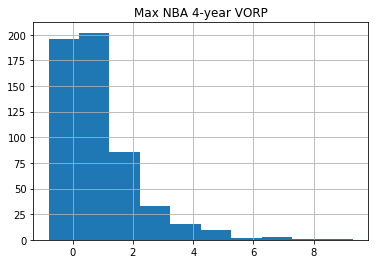

In [6]:
df['nba_vorp'].hist()
plt.title('Max NBA 4-year VORP')

#### 1.1.2 | Advanced Statistics

__Description__: Rather than create one section for each advanced statistic, I will create one large correlation chart for all of them. Based on those results, I will determine which statistics to investigate further.

__Results__: The results seem to indicate that none of the advanced metrics are predictive of future NBA success in the first 4 years since none of the correlation values are higher than .439 (box plus-minus) compared to 4-year VORP. I was suprised to find that none of the statistics were more predictive, at least linearlly. Of course, this type of analysis is evaluating each statistics in a vacuumn whereas NBA success is likely a product of high performance in a combination of statistics (strengths). I suspect a factor to consider is the variance in competition. I attempted to limit the analysis to major Division I schools but there appears to still be some unexplained variance. My next approach will be to consider more traditional per game statistics. I think prior analysis has shown that advanced statistics are more accurate measure of performance than traditional statistics but in order to turn over all rocks, I will run this analysis next. If traditional box score stats are indicative of NBA success, than I can expand the number of years of college basketball data I collect. 

<Figure size 432x288 with 0 Axes>

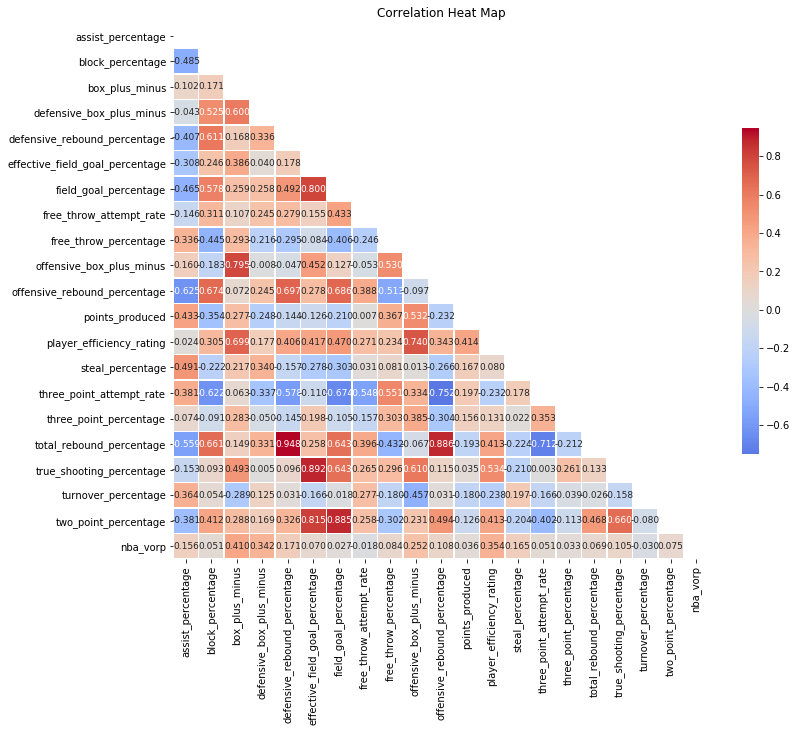

In [8]:
#career stats
corr_fields = ['assist_percentage',
       'block_percentage', 'box_plus_minus',
       'defensive_box_plus_minus', 'defensive_rebound_percentage',
       'effective_field_goal_percentage',
       'field_goal_percentage','free_throw_attempt_rate',
       'free_throw_percentage', 
       'offensive_box_plus_minus', 'offensive_rebound_percentage','points_produced',
       'player_efficiency_rating', 'steal_percentage',
       'three_point_attempt_rate','three_point_percentage', 'total_rebound_percentage',
       'true_shooting_percentage', 'turnover_percentage',
       'two_point_percentage','nba_vorp']

for i in [corr_fields]:
    corr_chart(df_corr = df[i])

<Figure size 432x288 with 0 Axes>

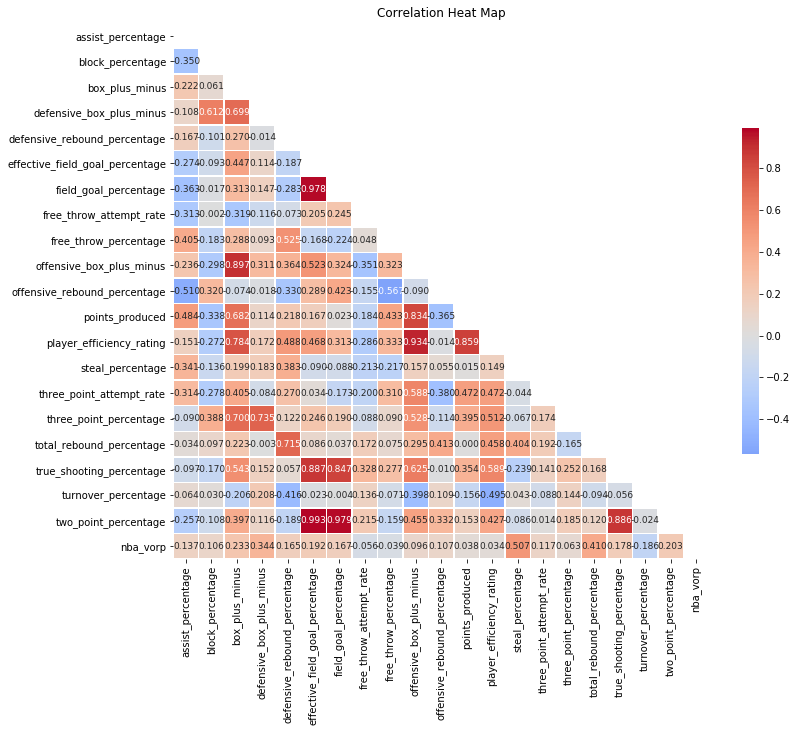

<Figure size 432x288 with 0 Axes>

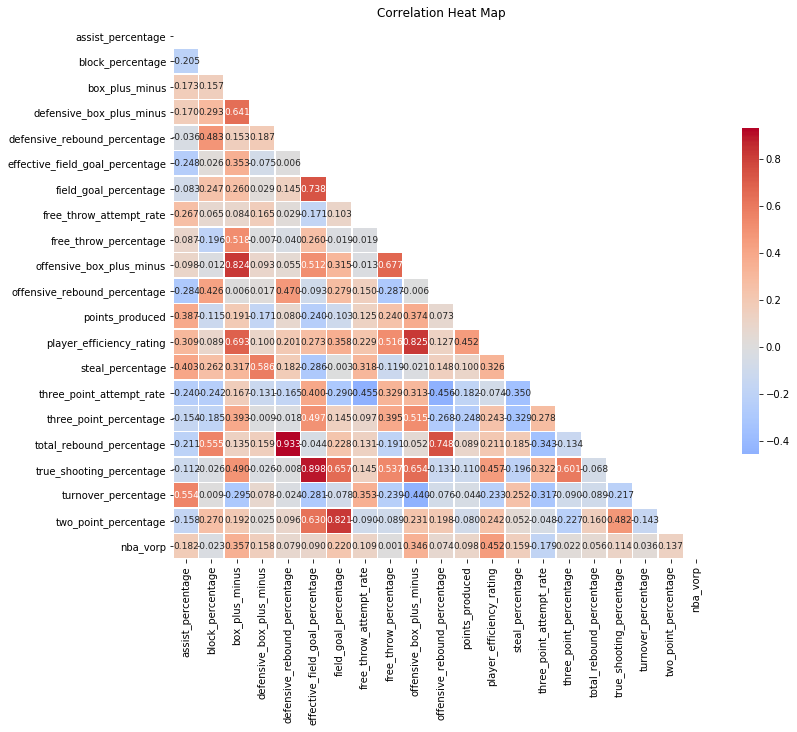

<Figure size 432x288 with 0 Axes>

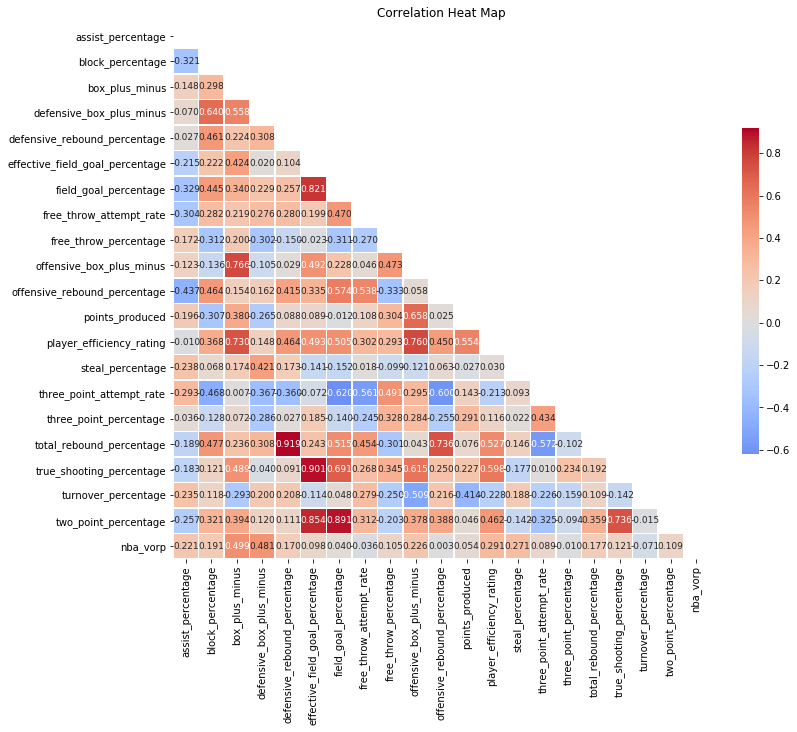

In [9]:
for j in ['Center','Guard','Forward']:
    for i in [corr_fields]:
        corr_chart(df_corr = df[i][df['position']==j])

### 1.2 | Last Year of College Basketball stats versus 4-year NBA VORP 

__Description__: Analysis of key metrics between the last year of a player's college career and accumulated 4-year NBA VORP per basketball reference. 

#### 1.2.1 | Minutes Played

__Hypothesis__: Unlike career minutes played, there will be a stronger correlation between minutes played in a player's final collegiate season and their NBA success. This view will control for those players who are "one-and-done" and those who play multiple years in college. 

__Results__: Suprisingly, there appears to be an equally weak correlation when evaluating based on a player's final year of school. This would support the idea that per game statistics are not a good indicator of NBA success and rather, advanced statistics that are per 36 or per-posession based will be more valuable.

Text(0.5, 1.0, 'Minutes Played')

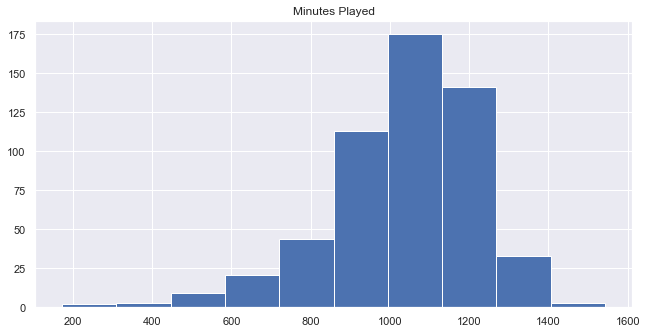

In [27]:
#distribution of career minutes played
combo_df.minutes_played.hist()
plt.title('Minutes Played')

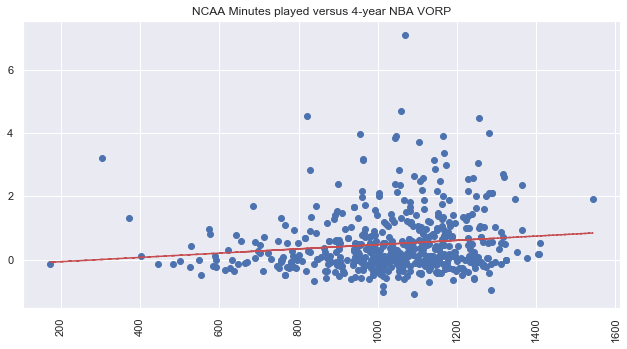

In [28]:
plot_scatter(combo_df['minutes_played'][combo_df['minutes_played']>100],combo_df['4-year NBA VORP'][combo_df['minutes_played']>100],title = 'NCAA Minutes played versus 4-year NBA VORP')

#### 1.2.2 | Advanced Statistics

__Description__: Rather than create one section for each advanced statistic, I will create one large correlation chart for all of them. Based on those results, I will determine which statistics to investigate further.

__Results__: The results seem to indicate that none of the advanced metrics, individually, are strongly predictive of future NBA success. Regardless of position, defensive box plus-minus has the strongest correlation at .34. This makes sense as it is an "all-in-one" metric that tries to combine components like steal percentage, block percentage, etc. 
<br>
<br>
Looking at the breakout by position, we start to seem some stronger correlations between defensive metrics and the center position. Defensive box plus-minus and steal percentage have correlations of .684 and .64 respectively. Of note, block percentage is a weak predictor of success at the center position. With the growing importance of rim protection, this is suprising to see. 
<br>
<br>
For the guard and forward positions, no one metric stands out with all the correlations < .4.

<Figure size 432x288 with 0 Axes>

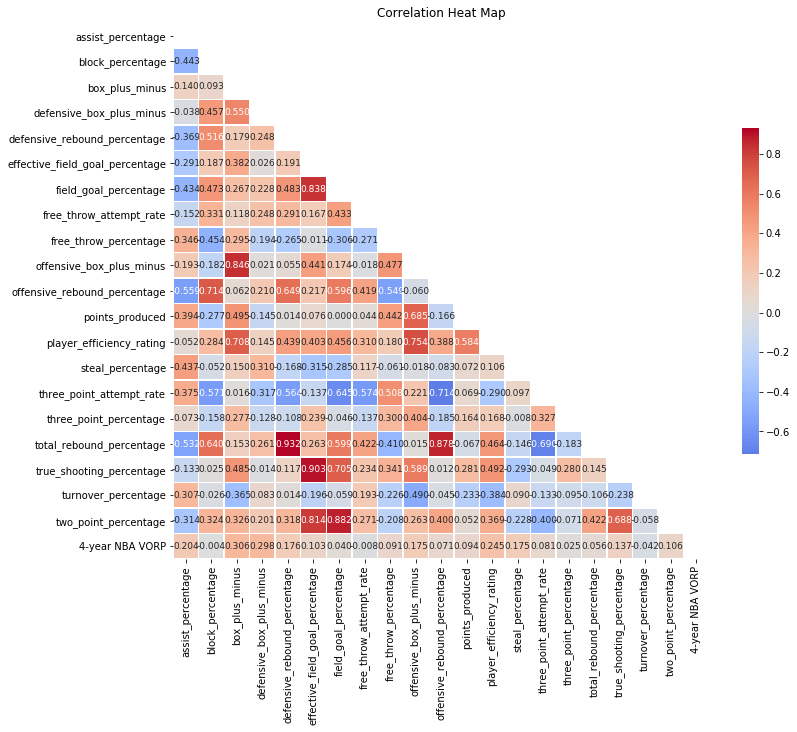

<Figure size 432x288 with 0 Axes>

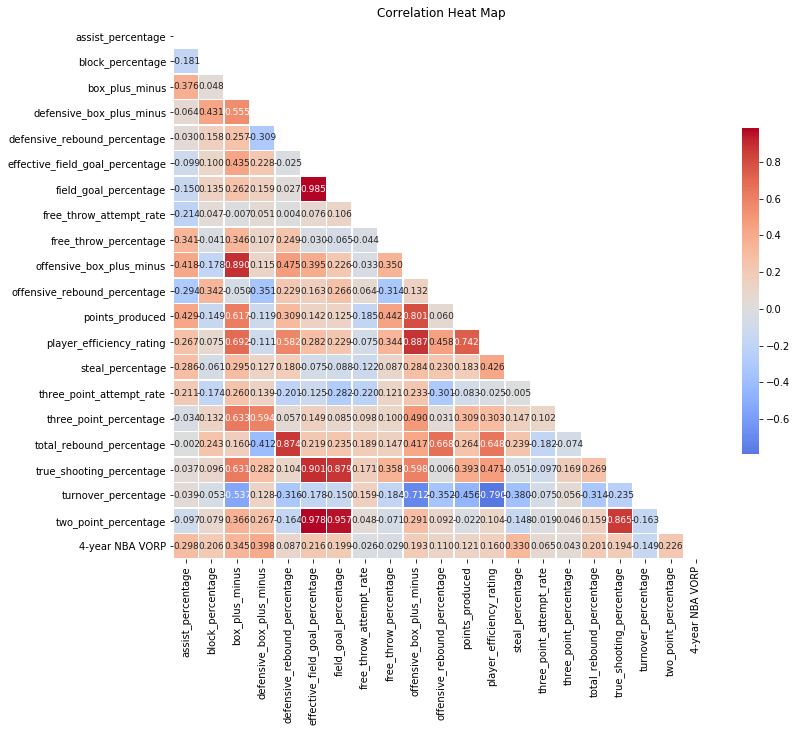

<Figure size 432x288 with 0 Axes>

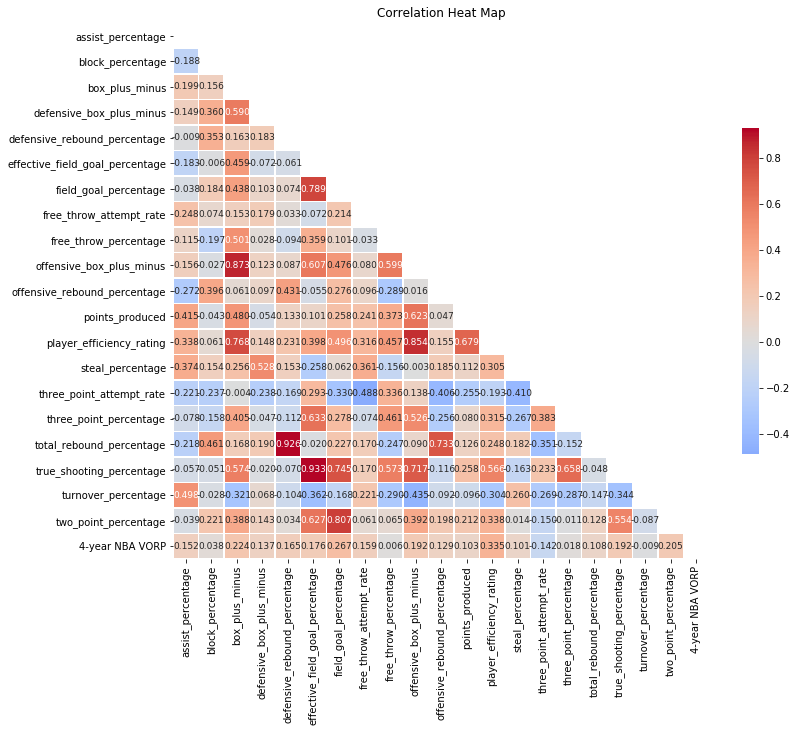

<Figure size 432x288 with 0 Axes>

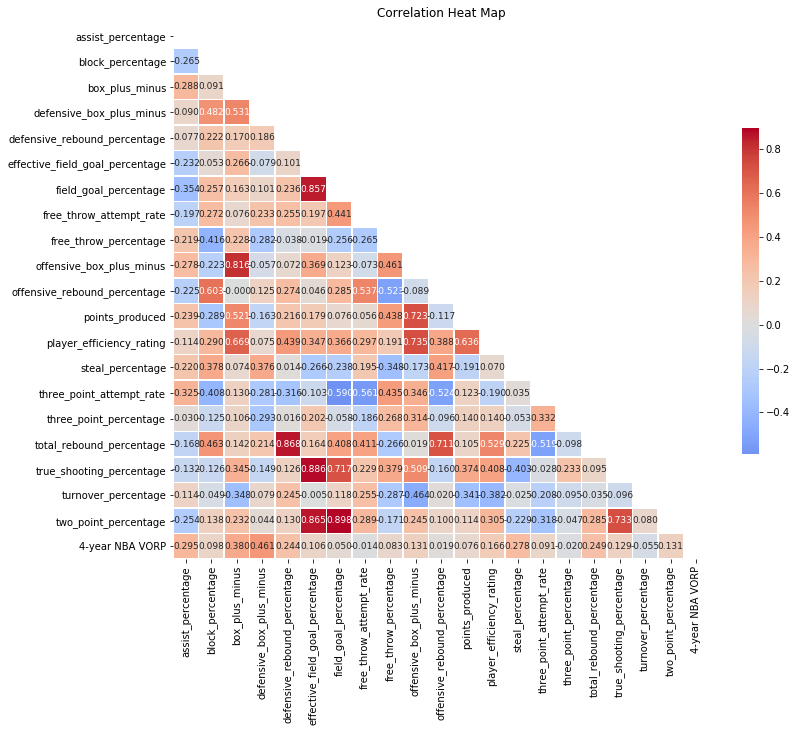

In [12]:
#career stats
corr_fields = ['assist_percentage',
       'block_percentage', 'box_plus_minus',
       'defensive_box_plus_minus', 'defensive_rebound_percentage',
       'effective_field_goal_percentage',
       'field_goal_percentage','free_throw_attempt_rate',
       'free_throw_percentage', 
       'offensive_box_plus_minus', 'offensive_rebound_percentage','points_produced',
       'player_efficiency_rating', 'steal_percentage',
       'three_point_attempt_rate','three_point_percentage', 'total_rebound_percentage',
       'true_shooting_percentage', 'turnover_percentage',
       'two_point_percentage','4-year NBA VORP']

for i in [corr_fields]:
    corr_chart(df_corr = combo_df[i])

for j in ['Center','Guard','Forward']:
    for i in [corr_fields]:
        corr_chart(df_corr = combo_df[i][combo_df['position']==j])

#### TS% versus VORP

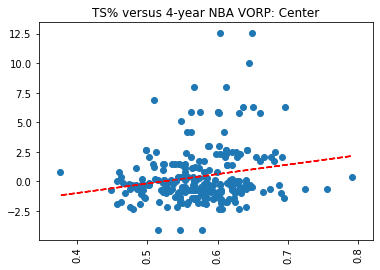

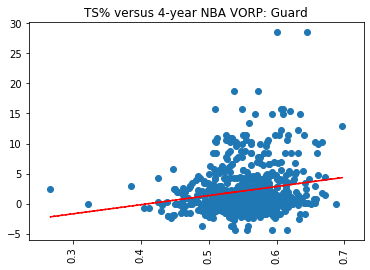

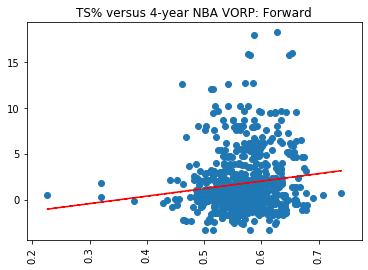

In [13]:
#all players
for j in ['Center','Guard','Forward']:
    plot_scatter(combo_df['true_shooting_percentage'][(combo_df['true_shooting_percentage']>.2)&(combo_df['position']==j)],combo_df['4-year NBA VORP'][(combo_df['true_shooting_percentage']>.2)&(combo_df['position']==j)],title = 'TS% versus 4-year NBA VORP: '+j)

### 1.3 | Miscellaneous Metrics versus 4-year NBA VORP 

__Description__: Analysis of key metrics between the last year of a player's college career and accumulated 4-year NBA VORP per basketball reference. 

#### 1.3.1 | HS Recruiting Ranking

__Hypothesis__: A player's college recruiting ranking among their HS class is an early indicator of their future success. 

__Results__: Contrary to expectation, there is not a strong correlation. It appears most of the elite nba stars are highly touted in high school but generally speaking, this trend does not play out for other levels of prospects. For example, the best player in a high school class has about the same range of outcomes as a player who is not in the top 30. 

Text(0.5, 1.0, 'Distribution of NBA Outcomes by Consensus HS Recruiting Ranking')

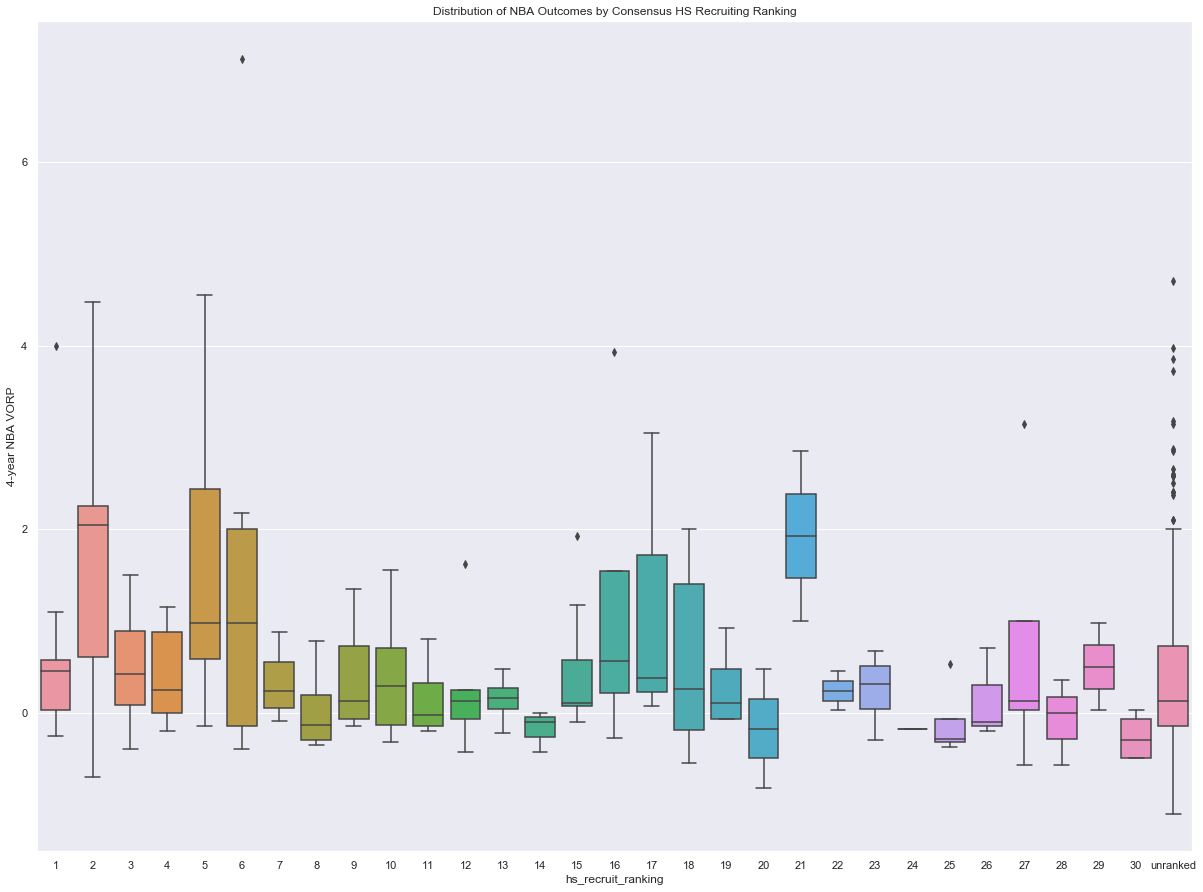

In [44]:
sns.set(rc={'figure.figsize':(20.7,15.27)})
order = [str(i) for i in range(1,31)]
order.append('unranked')
sns.boxplot(x = 'hs_recruit_ranking', y = '4-year NBA VORP',data = combo_df,order = order)
plt.title('Distribution of NBA Outcomes by Consensus HS Recruiting Ranking')

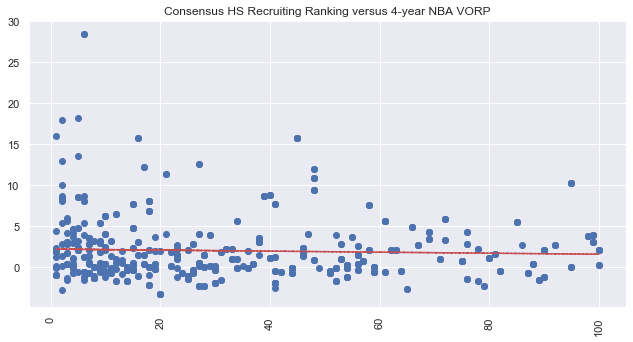

In [46]:
sns.set(rc={'figure.figsize':(10.7,5.27)})
plot_scatter(combo_career_df[combo_career_df['hs_recruit_ranking']!='unranked']['hs_recruit_ranking'].astype('int64'),combo_career_df[combo_career_df['hs_recruit_ranking']!='unranked']['4-year NBA VORP'],title = 'Consensus HS Recruiting Ranking versus 4-year NBA VORP')

#### 1.3.2 | Player Height

__Hypothesis__: The taller a player is for their position, the higher their box score plus minus
<br>
<br>
__Result__: There does not appear to be much correlation between height and college production by position or otherwise. A follow-up question would be whether this trend applies to NBA production as well. 

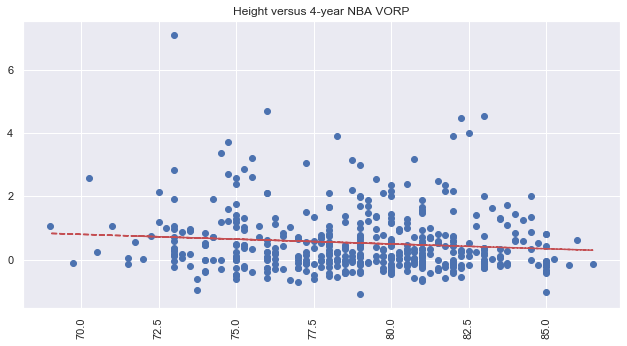

In [57]:
#all players
test = combo_df[['height_w_shoes','position','4-year NBA VORP']].dropna(how='any')
plot_scatter(test['height_w_shoes'],test['4-year NBA VORP'],title = 'Height versus 4-year NBA VORP')

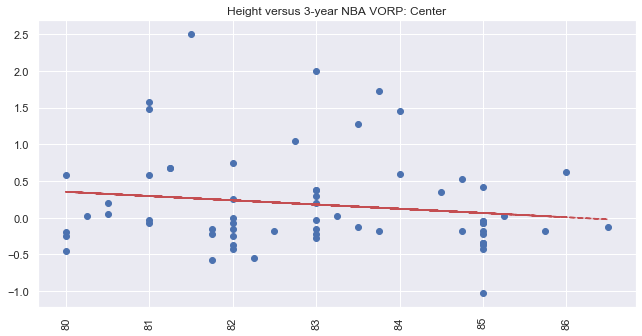

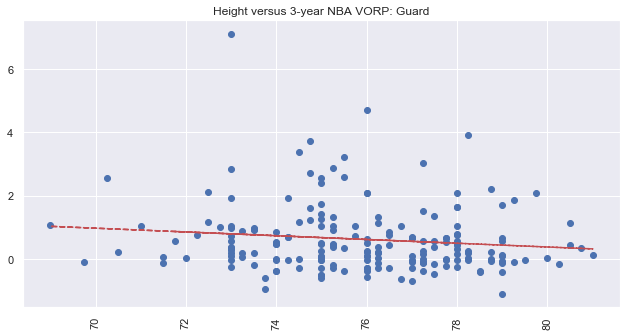

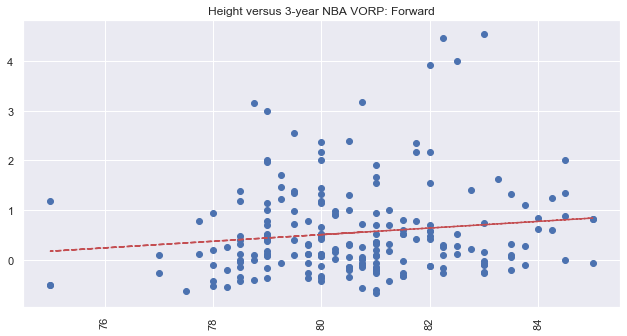

In [58]:
#players by position
for i in ['Center','Guard','Forward']:
    plot_scatter(test['height_w_shoes'][test['position']==i],test['4-year NBA VORP'][test['position']==i],title = 'Height versus 3-year NBA VORP: '+i)

#### 1.3.3 | Combine Measurements

__Hypothesis__: Combine Measurements are indicative of future NBA success
<br>
<br>
__Result__: 

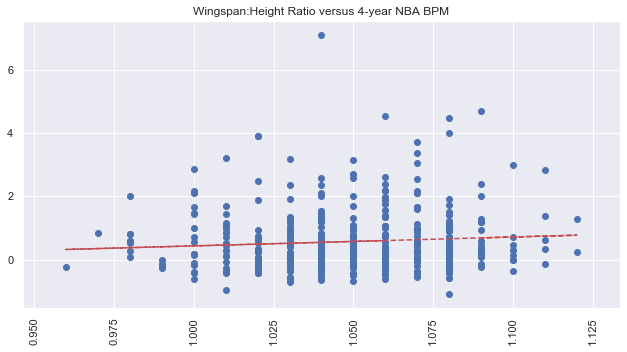

In [55]:
combo_df['wingspan_factor'] = round(combo_df['wingspan']/combo_df['height_w_shoes'].astype('float'),2)
test = combo_df[['wingspan_factor','4-year NBA VORP']].dropna(how='any')
plot_scatter(test['wingspan_factor'],test['4-year NBA VORP'],title = 'Wingspan:Height Ratio versus 4-year NBA VORP')

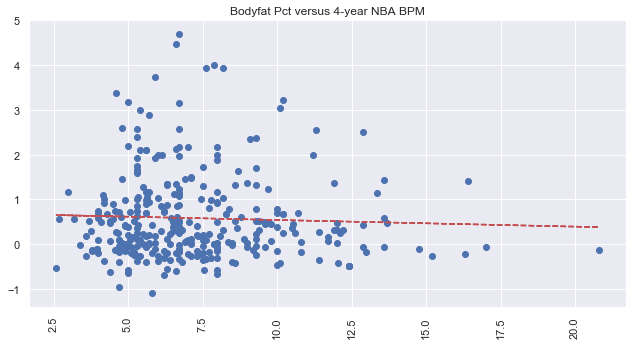

In [59]:
test = combo_df[['body_fat_pct','4-year NBA VORP']].dropna(how='any')
plot_scatter(test['body_fat_pct'],test['4-year NBA VORP'],title = 'Bodyfat Pct versus 4-year NBA VORP')

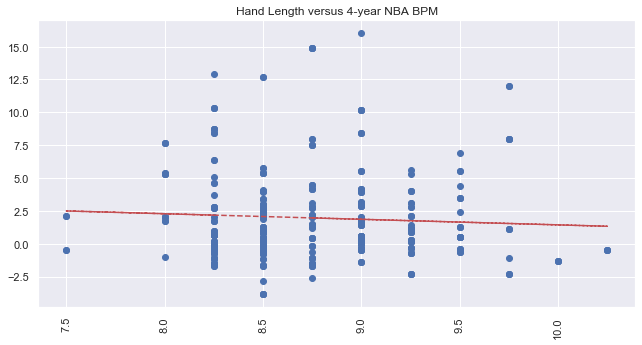

In [62]:
test = combo_career_df[['hand_length','4-year NBA VORP']].dropna(how='any')
plot_scatter(test['hand_length'],test['4-year NBA VORP'],title = 'Hand Length versus 4-year NBA VORP')